# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params, corn_params, grid_params],
        shape_gene_pool=[
            double_parabolic_params
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

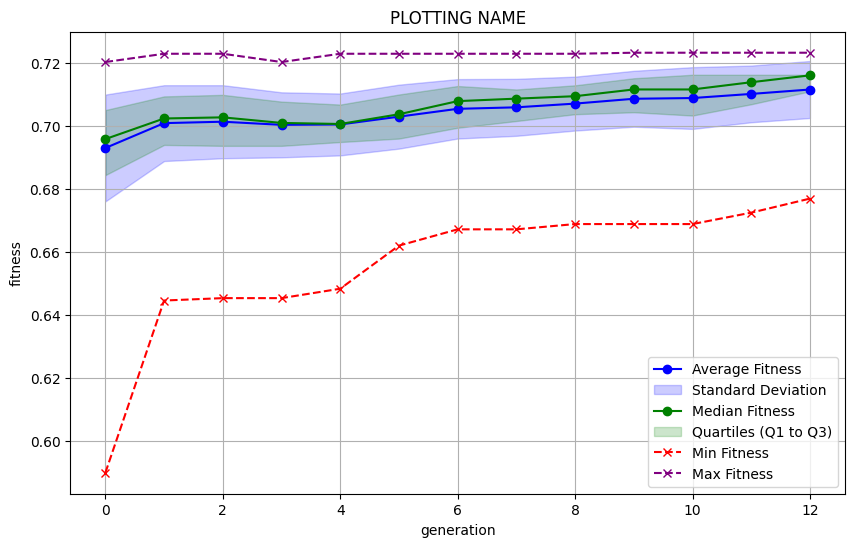

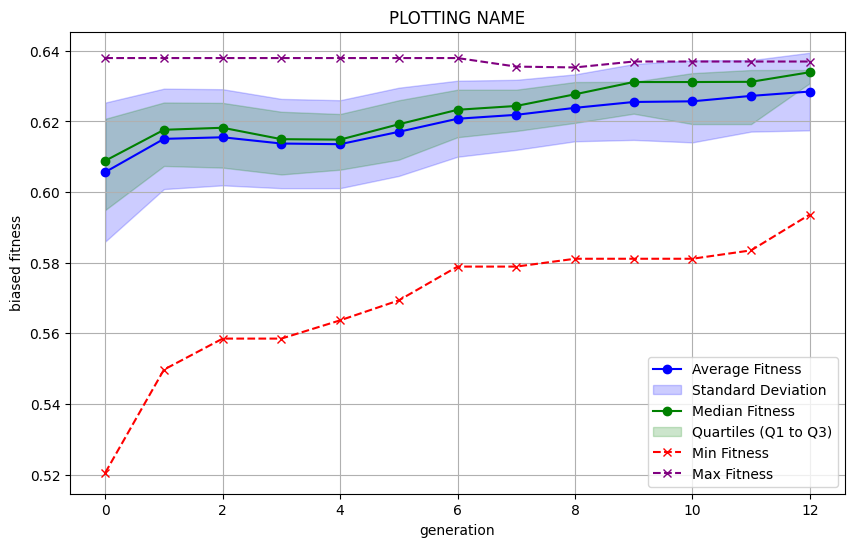

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_429: ['DoubleParabolicShape_235', 'CircularStrictTransformation_9']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


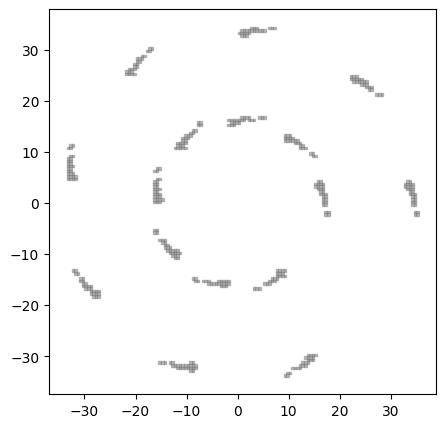

--------------------------------------------------
label: VentHole Chromosome_455: ['DoubleParabolicShape_285', 'CircularStrictTransformation_235']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


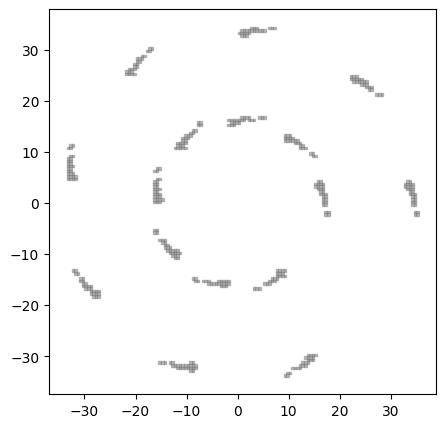

--------------------------------------------------
label: VentHole Chromosome_473: ['DoubleParabolicShape_285', 'CircularStrictTransformation_455']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


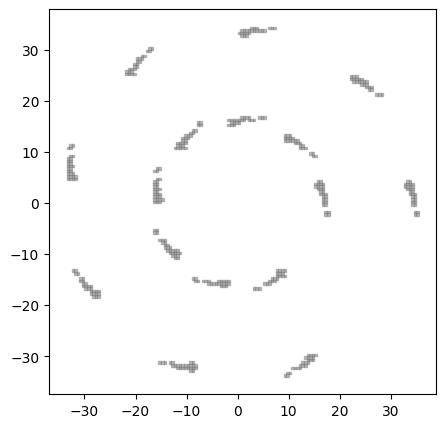

--------------------------------------------------
label: VentHole Chromosome_499: ['DoubleParabolicShape_473', 'CircularStrictTransformation_207']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


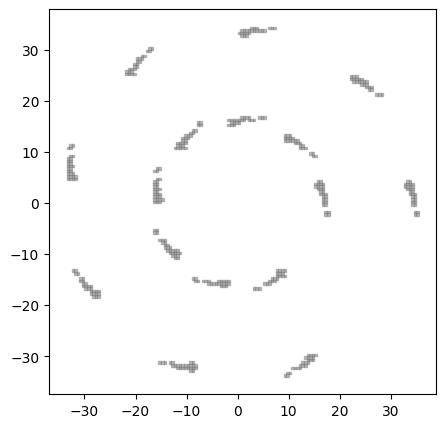

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_285', 'CircularStrictTransformation_89']
predict: (0.28880013900886725, 372.8464741, 456.53600979999993)
biased_fitness: 0.6294936637758584, fitness: 0.7150861904113276
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


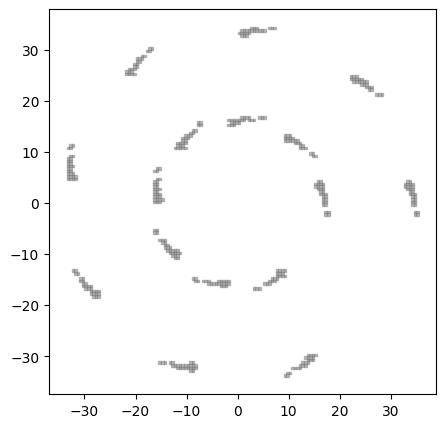

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_429', 'CircularStrictTransformation_8']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


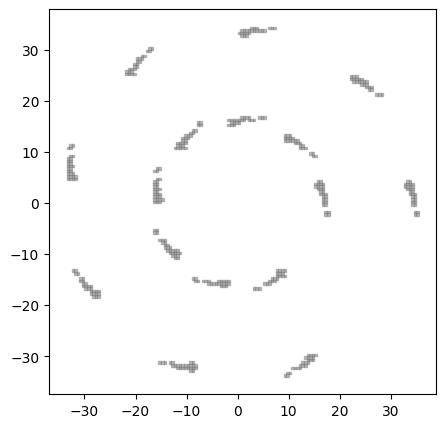

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_207', 'CircularStrictTransformation_313']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


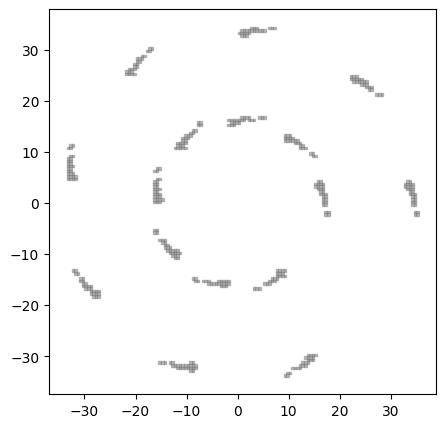

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_9', 'CircularStrictTransformation_429']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


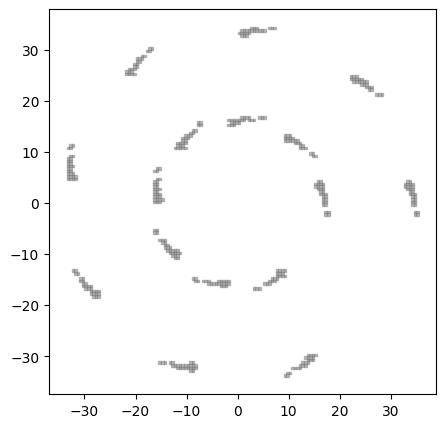

--------------------------------------------------
label: VentHole Chromosome_429: ['DoubleParabolicShape_285', 'CircularStrictTransformation_454']
predict: (0.28845000615851424, 372.98478320000004, 457.78671209999976)
biased_fitness: 0.6312025735808008, fitness: 0.7116424619148585
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


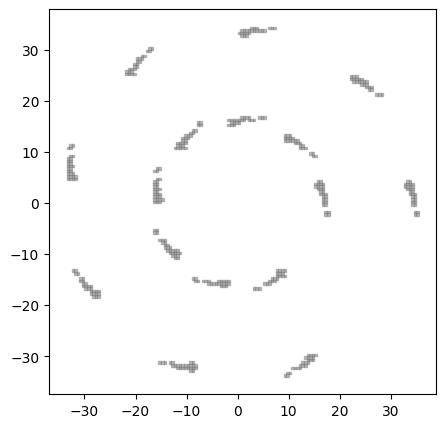

--------------------------------------------------
label: VentHole Chromosome_499: ['DoubleParabolicShape_344', 'CircularStrictTransformation_429']
predict: (0.2905637770587366, 373.3056691000001, 458.3254245999996)
biased_fitness: 0.5989279264776878, fitness: 0.6862067609126353
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


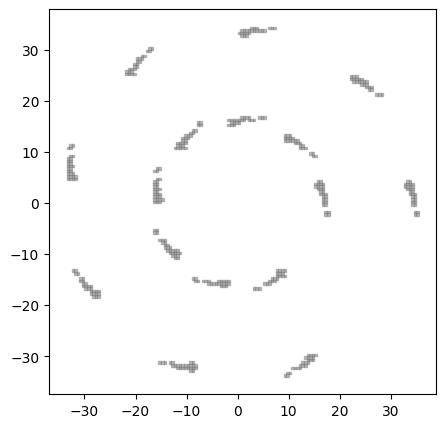

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_455', 'CircularStrictTransformation_499']
predict: (0.2890853510798923, 373.2971054999999, 455.6028579000001)
biased_fitness: 0.625113841581508, fitness: 0.7146466722010768
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


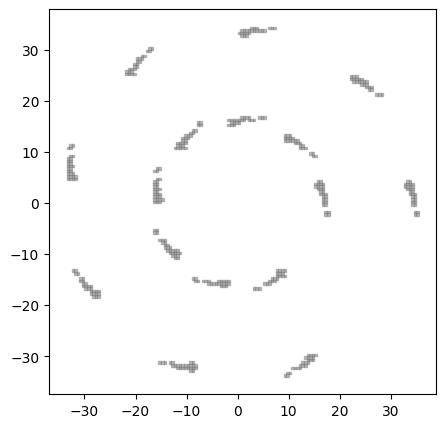

--------------------------------------------------
label: VentHole Chromosome_150: ['DoubleParabolicShape_285', 'CircularStrictTransformation_285']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


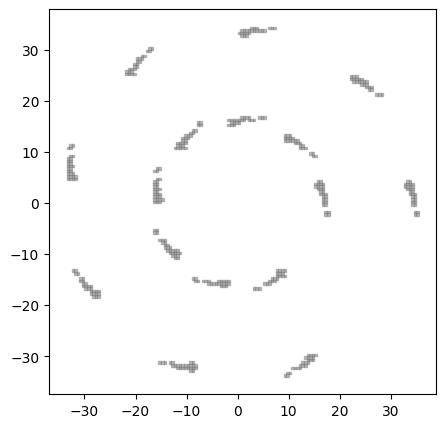

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_473', 'CircularStrictTransformation_285']
predict: (0.2906091187836366, 373.18837740000004, 458.3679141999996)
biased_fitness: 0.5987946216290881, fitness: 0.6861273541636358
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


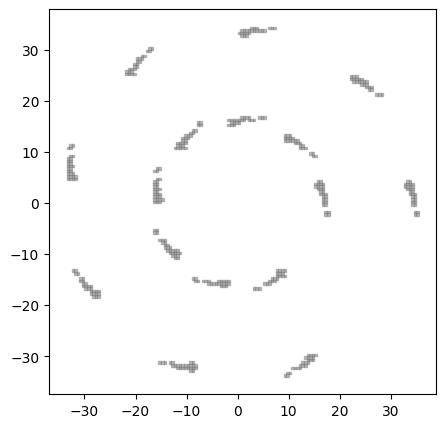

--------------------------------------------------
label: VentHole Chromosome_58: ['DoubleParabolicShape_499', 'CornerTransformation_285']
predict: (0.28887790864673635, 373.20667560000004, 457.78609980000016)
biased_fitness: 0.6241037013456905, fitness: 0.7062570365326354
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


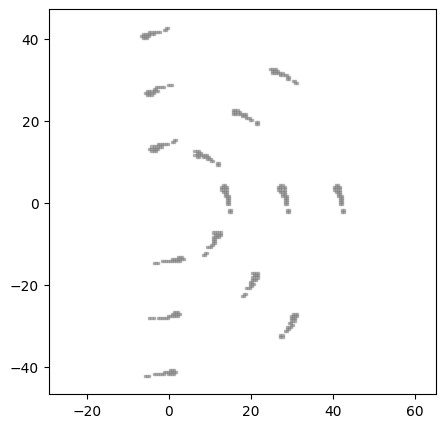

--------------------------------------------------
label: VentHole Chromosome_429: ['DoubleParabolicShape_207', 'CircularStrictTransformation_429']
predict: (0.2905637770587366, 373.3056691000001, 458.3254245999996)
biased_fitness: 0.5989279264776878, fitness: 0.6862067609126353
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


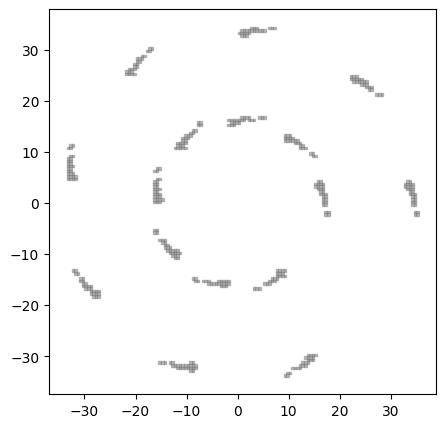

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_429', 'CircularStrictTransformation_499']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


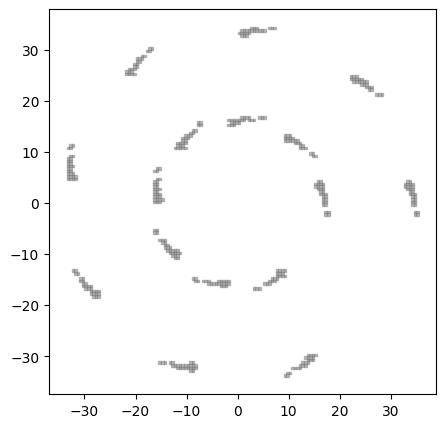

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_35', 'CircularStrictTransformation_429']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


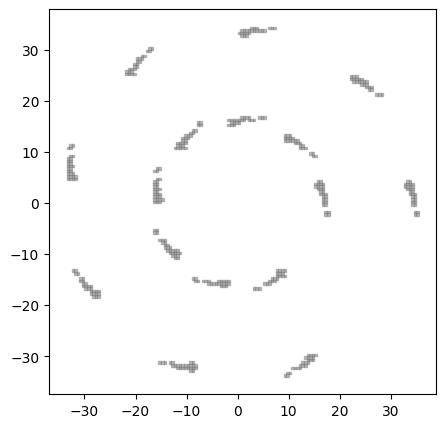

--------------------------------------------------
label: VentHole Chromosome_313: ['DoubleParabolicShape_473', 'CornerTransformation_121']
predict: (0.28864466419339796, 372.78299949999996, 458.0679458)
biased_fitness: 0.6289238121924287, fitness: 0.7092986315660205
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 9.46684644916313, phi: 0.7411896261989093, rot_count: 3.0, ]


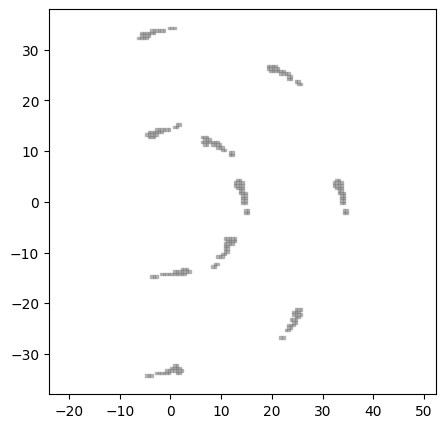

--------------------------------------------------
label: VentHole Chromosome_35: ['DoubleParabolicShape_454', 'CircularStrictTransformation_450']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 14.430235967303322, dx: 7.529280368816107, phi: 0.28559933214452665, ]


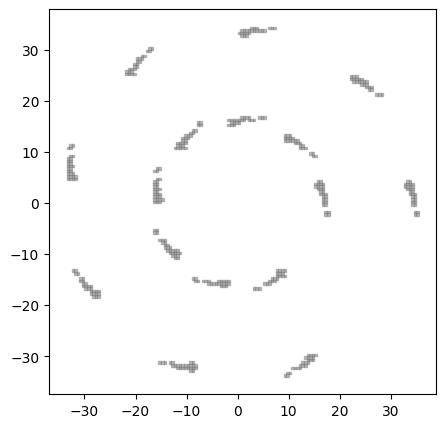

--------------------------------------------------
label: VentHole Chromosome_473: ['DoubleParabolicShape_35', 'CircularStrictTransformation_313']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


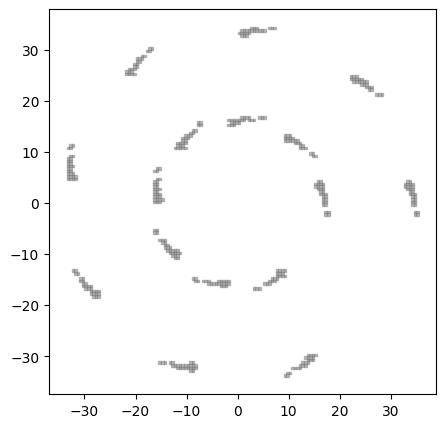

--------------------------------------------------
label: VentHole Chromosome_473: ['DoubleParabolicShape_289', 'CornerTransformation_121']
predict: (0.28864466419339796, 372.78299949999996, 458.0679458)
biased_fitness: 0.6289238121924287, fitness: 0.7092986315660205
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 9.46684644916313, phi: 0.7411896261989093, rot_count: 3.0, ]


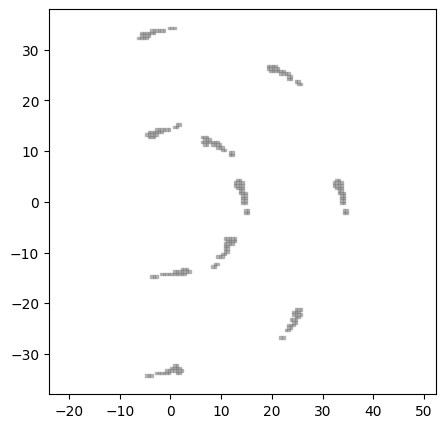

--------------------------------------------------
label: VentHole Chromosome_9: ['DoubleParabolicShape_285', 'CircularStrictTransformation_285']
predict: (0.28836839262710257, 372.89902729999994, 455.69998199999986)
biased_fitness: 0.6369474027205645, fitness: 0.7233210272289752
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


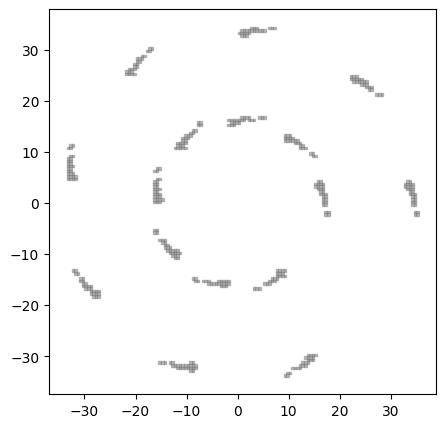

--------------------------------------------------
label: VentHole Chromosome_473: ['DoubleParabolicShape_89', 'CornerTransformation_58']
predict: (0.2890332098150341, 373.10100570000014, 456.8272942)
biased_fitness: 0.6243754456895216, fitness: 0.7100264023496581
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 3.781822805531422, phi: 0.7411896261989093, rot_count: 4.0, ]


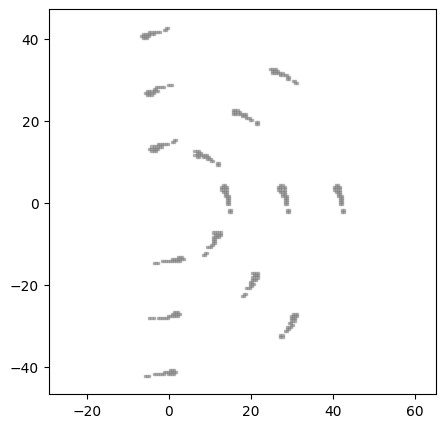

--------------------------------------------------
label: VentHole Chromosome_313: ['DoubleParabolicShape_285', 'CircularStrictTransformation_313']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


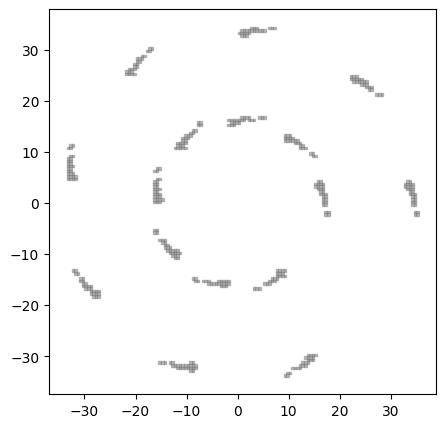

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_238', 'CircularStrictTransformation_285']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


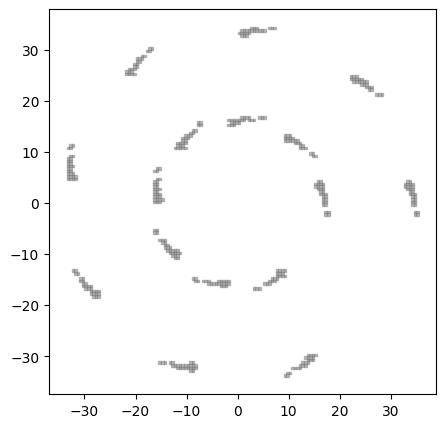

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_89', 'CircularStrictTransformation_285']
predict: (0.2883290540516743, 372.89760499999994, 457.18072609999996)
biased_fitness: 0.63454376607656, fitness: 0.7163178039832574
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


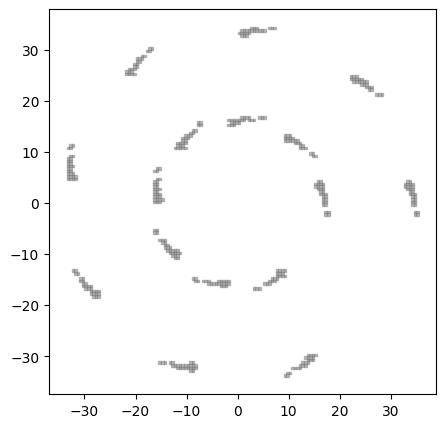

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_454', 'CornerTransformation_150']
predict: (0.2886214882316027, 372.9191152000001, 455.8823166999999)
biased_fitness: 0.6329389553575617, fitness: 0.7197779581839729
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


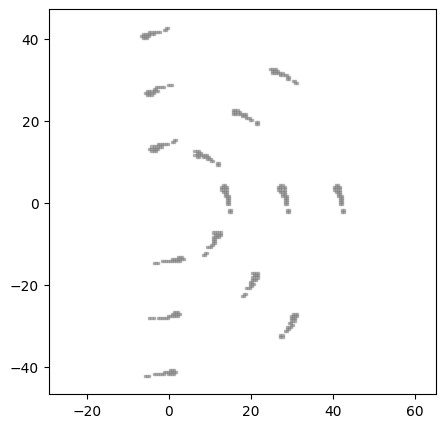

--------------------------------------------------
label: VentHole Chromosome_8: ['DoubleParabolicShape_9', 'CornerTransformation_473']
predict: (0.2887563053477171, 372.77630780000004, 456.1522392999999)
biased_fitness: 0.6312257075319601, fitness: 0.7177942110228289
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 3.781822805531422, phi: 0.7411896261989093, rot_count: 4.0, ]


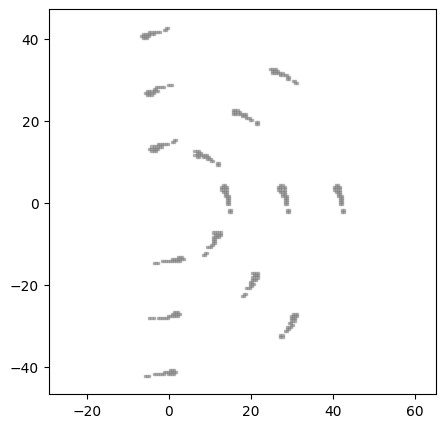

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_454', 'CircularStrictTransformation_313']
predict: (0.28845000615851424, 372.98478320000004, 457.78671209999976)
biased_fitness: 0.6312025735808008, fitness: 0.7116424619148585
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


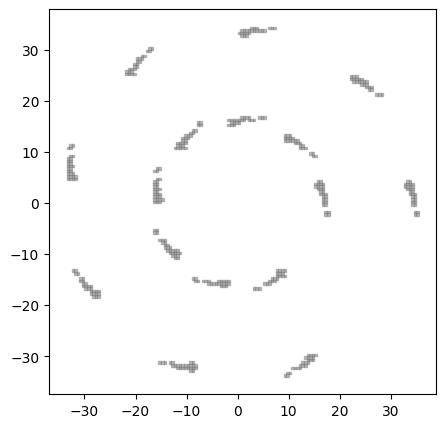

--------------------------------------------------
label: VentHole Chromosome_207: ['DoubleParabolicShape_89', 'CornerTransformation_8']
predict: (0.2901240653138246, 373.5625572000001, 457.34900269999997)
biased_fitness: 0.6057522942064549, fitness: 0.6942015473617535
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 3.781822805531422, phi: 0.7411896261989093, rot_count: 4.0, ]


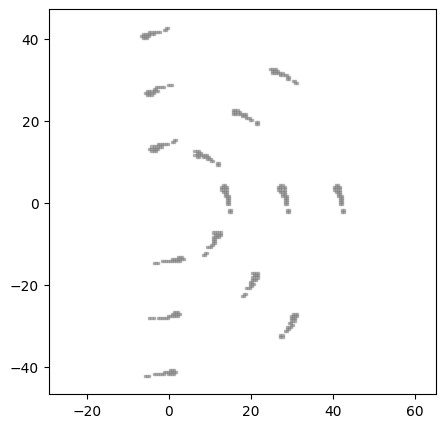

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_150', 'CornerTransformation_473']
predict: (0.2891797349760914, 373.06588580000005, 456.98771220000015)
biased_fitness: 0.6221788569347199, fitness: 0.707934660239085
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 8.394132526414918, dx: 9.46684644916313, phi: 0.7411896261989093, rot_count: 2.0, ]


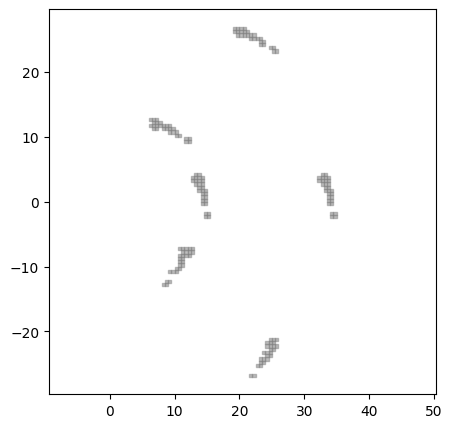

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_285', 'CornerTransformation_150']
predict: (0.28935607423613074, 373.1062780000001, 457.0068523000001)
biased_fitness: 0.6194698660941688, fitness: 0.7058736061386914
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.3279983665056196, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


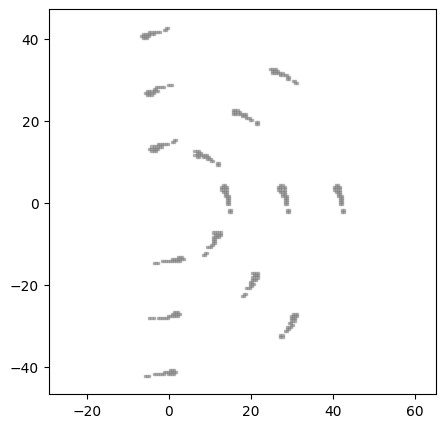

--------------------------------------------------
label: VentHole Chromosome_473: ['DoubleParabolicShape_89', 'CornerTransformation_285']
predict: (0.2898268034905018, 373.30829269999987, 457.09163120000005)
biased_fitness: 0.6117000252329747, fitness: 0.699732345594982
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


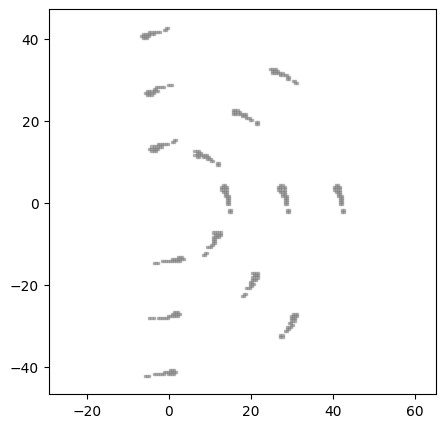

--------------------------------------------------
label: VentHole Chromosome_89: ['DoubleParabolicShape_207', 'CircularStrictTransformation_89']
predict: (0.2886493824379506, 372.87341250000003, 457.7086603999998)
biased_fitness: 0.629124262568692, fitness: 0.7105958111204949
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.623271641321997, dx: 7.529280368816107, phi: 0.28559933214452665, ]


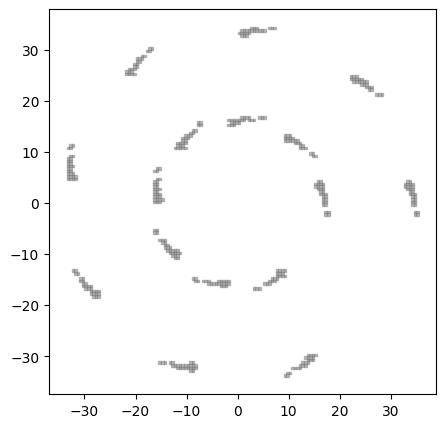

--------------------------------------------------
label: VentHole Chromosome_429: ['DoubleParabolicShape_58', 'CornerTransformation_473']
predict: (0.2888157300855889, 372.82039360000016, 456.6734730999999)
biased_fitness: 0.6291308646017544, fitness: 0.7143733656441104
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


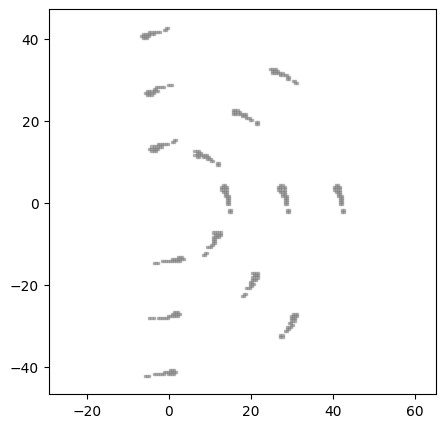

--------------------------------------------------
label: VentHole Chromosome_150: ['DoubleParabolicShape_9', 'CornerTransformation_429']
predict: (0.289748877263162, 372.7802801, 458.6052911999997)
biased_fitness: 0.6124037354157322, fitness: 0.6955833708683811
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


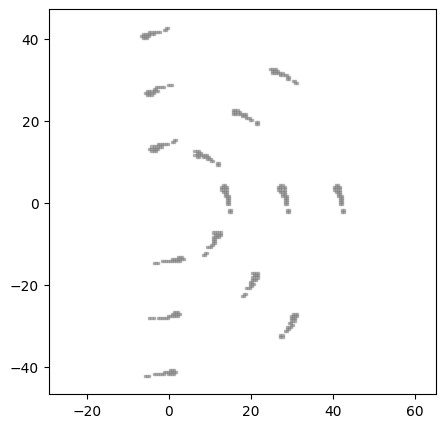

--------------------------------------------------
label: VentHole Chromosome_285: ['DoubleParabolicShape_289', 'CornerTransformation_150']
predict: (0.2883681567382621, 372.8876066, 457.99115570000004)
biased_fitness: 0.6324254612643302, fitness: 0.7119246211173785
shape parameter:
parameter_list: [ lower_coefficient: 1.1964577501642029, upper_coefficient: 2.7290009143557095, lower_y-intercept: 2.7946217456610993, upper_y-intercept_from_lower_y: 1.452877008962468, lower_x_trans: 0.6764482341513602, ]
pattern parameter:
parameter_list: [ di: 10.596919027281707, dx: 6.3141575049711305, phi: 0.5207617867968144, rot_count: 4.0, ]


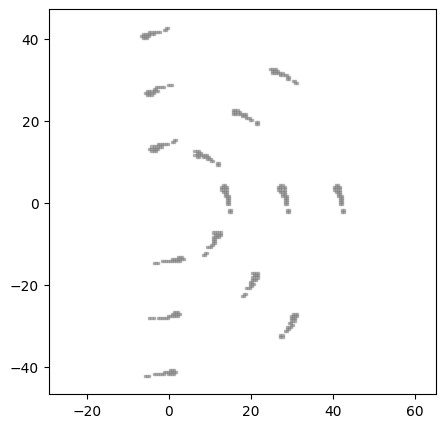

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )